# STA 208: Homework 2 (Do not distribute)

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Consider Poisson model with rate parameter $\lambda$ which has PMF,
$$
p(y|\lambda) = \frac{\lambda^y}{y!} e^{-\lambda},
$$
where $y = 0,1,\ldots$ is some count variable.
In Poison regression, we model $\lambda = e^{\beta^\top x}$ to obtain $p(y | x,\beta)$.

1. Let the loss function for Poisson regression be $\ell_i(\beta) \propto - \log p(y_i | x_i, \beta)$ for a dataset consisting of predictor variables and count values $\{x_i,y_i\}_{i=1}^n$.  Here $\propto$ means that we disregard any additive terms that are not dependent on $\beta$.  Write an expression for $\ell_i$ and derive its gradient. 
2. Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.
3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.
4. I have a script to simulate from this model below.  Implement the gradient descent algorithm above and show that with enough data (n large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).

#### 1 
Given that PMF $p(y|\lambda) = \frac{\lambda^y}{y!}e^{-\lambda}$ and $\lambda = e^{\beta^Tx}$, we have 
$$\ell_i(\beta) \propto - \log p(y_i | x_i, \beta) = - y_i\log\lambda+\log y_i!+\lambda=-y_i\beta^Tx_i +\log y_i! + e^{\beta^Tx_i}$$
We disregrard any additive terms that are not dependent on $\beta$. So the expression for $\ell_i$ is 
$$ \ell_i(\beta) = -y_i\beta^Tx_i + e^{\beta^Tx_i}$$
The gradient is 
$$\nabla \ell_i(\beta) = -y_i x_i + e^{\beta^Tx_i}x_i=x_i(-y_i + e^{\beta^Tx_i})$$


#### 2
First, we know that the empirical risk is
$$R_n(\beta) = \frac{1}{n}\sum_{i=1}^n -y_i\beta^Tx_i + e^{\beta^Tx_i} $$
then
$$\nabla^2 R_n(\beta) = \frac{1}{n} \sum_{i=1}^n x_i e^{\beta^Tx_i}x_i^T $$
By the definition, we know that 
$$\beta^T (\frac{1}{n} \sum_{i=1}^n x_i e^{\beta^Tx_i}x_i^T ) \beta = \frac{1}{n} \sum_{i=1}^n (\beta^Tx_i e^{\beta^Tx_i}x_i^T \beta)=\frac{1}{n} \sum_{i=1}^n e^{\beta^Tx_i} (\beta^Tx_ix_i^T \beta) $$
$e^{\beta^Tx_i}>0$ and $\beta^Tx_ix_i^T \beta\geq 0 $  Obviouly, for any $\beta$, the expression is larger than 0 , so we have 
$$\beta^T (\frac{1}{n} \sum_{i=1}^n x_i e^{\beta^Tx_i}x_i^T ) \beta \geq 0,\quad \forall \beta$$


#### 3
Notice that $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ is the iteration of gradient descent. At the minimizer of $R_n(\beta)$, we know that the risk is a convex function, which means $\hat{\beta}$ is the solution of the equation
$$\nabla R_n(\hat{\beta}) = 0$$
Hence, for the iteration, 
$$F_\eta(\hat{\beta}) = \hat{\beta} - \eta \nabla R_n(\hat{\beta}) = \hat{\beta}$$

In [254]:
import numpy as np
import matplotlib.pyplot as plt

In [255]:
## Simulate from the Poisson regression model (use y,X)
n, p = 1000,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
lamb = np.exp(X @ beta)
y = np.random.poisson(lamb)

In [256]:
def GDA_Poisson(y,X,step = 0.001,epsilon = 0.001):
    """
    First, generate an initial beta
    Then, run the iteration
    
    """
    n,p = X.shape
    beta0 = np.zeros(p)
    for i in range(100000):
        GD = np.zeros(p)
        for j in range(n):
            GD += X[j,:] * (-y[j] + np.exp(X[j,:] @ beta0))
        GD = GD/n 
        if np.linalg.norm(GD) < epsilon:   # The gradient is almost zero
            break
        else:
            beta0 = beta0 - step * GD 
    return beta0

print('the sum of square error  is ' + str(np.square(GDA_Poisson(y,X)-beta).mean()))

the sum of square error  is 0.0002725322452510004


In [257]:
n_list = [1000*(i+1) for i in range(10)]
error = []
for n in n_list:    
    p = 20
    X = np.random.normal(0,1,size = (n,p))
    beta = np.random.normal(0,.2,size = (p))
    lamb = np.exp(X @ beta)
    y = np.random.poisson(lamb)
    error.append(np.square(GDA_Poisson(y,X)-beta).mean())

We can notice that the larger n is, the smaller the error is. With enough data, the estimated $\hat{\beta}$ approaches the true $\beta$.

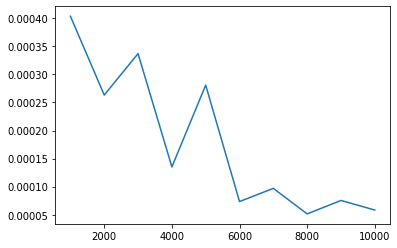

In [258]:
plt.plot(n_list,error)

__Exercise 2__ (30 pts)

Recall the subset selection problem with tuning parameter $k$,
$$
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2,
$$
where 
${\rm supp}(\beta) = \{j = 1\,\ldots,p : \beta_j \ne 0 \}$. Notice that we can write this as 
$$
\min_{\beta : \| \beta \|_0 \le k}\| y - X \beta \|_2^2,
$$
where 
1. Write the subset selection problem in the following form
$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$
where $P_S$ is a projection.  Describe the subspace that is the range of this projection.
2. Suppose that we have a nested sequence of models $S_1\subset S_2 \subset \ldots \subset S_p$ such that $|S_k| = k$ (it contains $k$ variables).  Prove that $$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$ for $k=1,\ldots,p-1$.  What does this tell us about the solution to the subset selection problem and the constraint $|S| \le k$?
3. Suppose that $X$ is orthogonal, then write a computationally efficient pseudocode to solve the subset selection problem.  Prove that it is correct (your algorithm actually solves subset selection under othogonal design).
4. (Challenge) Suppose that we have that $n = p$ and $y_i = \beta_i + \epsilon_i$ (identity design matrix) where $\epsilon_i$ satisfies 
$$
\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}
$$
for any $t > 0$ (this is true for central Normal RVs) for some $\sigma > 0$.
Suppose that there is some true $S_0 \subset\{1,\ldots,p\}$ such that $|S_0| = k < p$ and ${\rm supp}(\beta) = S_0$.
Prove the following.

__Proposition__
Define $\mu = \min_{j \in S_0} |\beta_j|$ and call $\mu / \sigma$ the signal-to-noise ratio.  Then if 
$$
\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)},
$$
then the true $S$ is selected by subset selection with probability at least $1 - \delta$.

Hint: rewrite the subset selection problem with $X = I$ and compare the objective at $S_0$ to any other $S$.

#### 1

We know that the minimizer of $\|y-X\beta\|_2^2$  is $(X^TX)^{-1}X^Ty$. Here, 
$$\|y-X(X^TX)^{-1}X^Ty\|_2^2 = \|(I-X(X^TX)^{-1}X^T)y\|_2^2 =\|(I-H)y\|_2^2=y^T(I-H)^T(I-H)y$$
If we consider that $|{\rm supp}(\beta)| \le k$, it means some variables of X don't work in the model, i.e. $X \rightarrow X_S$ and $H\rightarrow H_S$. Finally, $$P_S = (I-H_S)^T(I-H_S)=I-H_S$$
We know that it is a projection. It projects a vector to the orthogonal space of the column space  <$X_S$>,which means
$$(I-H_S)w\; \bot\; \text{<}X_S\text{>}$$

#### 2

$y^\top P_{S_k}y$ is the square sum of error. For $P_{S_k}$ and $P_{S_{k+1}}$ with $S_k \subset S_{k+1}$, we know that $S_{k+1}$ means that $k+1$ variables are used in the model and $S_{k}$ only uses $k$ of them. So the error of $y^\top P_{S_k}y$ is larger than $y^\top P_{S_{k+1}}y$. 

The proof is obvious. 

We denote $\beta_{k+1}=[\beta_k,\beta_j]$, here $\beta_{k+1}$ is the estimator of $y^\top P_{S_{k+1}}y$ and $\beta_{k}$ is the estimator of $y^\top P_{S_{k}}y$. For the $X_{k+1} = [X_k,x_j]$. and
$$(X_{k+1}^TX_{k+1})^{-1} = \Omega  = [\Omega_{1,1},\Omega_{1,2};\Omega_{2,1},\Omega_{2,2}]$$
Hence,
$y^\top P_{S_{k+1}}y =y^\top y-y^\top H_{k+1}y = y^\top y-y^\top(X_{k+1}(X_{k+1}^TX_{k+1})^{-1}X_{k+1}^T   )y$. 

$$X_{k+1}(X_{k+1}^TX_{k+1})^{-1}X_{k+1}^T = X_k\Omega_{1,1}X_k^T + C $$

Hence,
$$y^\top P_{S_{k+1}}y  = y^\top y - y^\top(X_k\Omega_{1,1}X_k)y- y^\top Cy = y^\top P_{S_{k}}y - y^\top Cy$$

Finally,
$$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$

It means once given $|S| \le k$, then the model will reach the solution at $|S|= k$ and the greedy algorithm works in this case.


#### 3
In this case, $X$ is orthogonal, so 
$$X^TX = diag (X_1^2,...,X_k^2)$$
Here, $X_i^2$ means the square of l2-norm of $X_i$ and
$$(X^TX)^{-1} = diag (1/X_1^2,...,1/X_k^2)$$
Hence, our model turns to be:
$$y^\top P_{S_{k+1}}y  = y^\top y-y^\top(X(X^TX)^{-1}X^T   )y$$
$$y^\top P_{S_{k+1}}y = y^2 -  (X^Ty)^T (X^Ty) diag (1/X_1^2,...,1/X_k^2)$$
Fianlly,
$$y^\top P_{S_{k+1}}y = ||y||^2 - \sum \frac{(X^Ty)_i^2}{||X_i||^2}$$

#### pseudocode

Compute $\frac{(X^Ty)_i^2}{||X_i||^2}$, for $i = 1,...,p$.

For i = 1,...,k:

$\quad$ Find $k$ largest $\frac{(X^Ty)_i^2}{||X_i||^2}$ and get their index.

$\quad$Compute $y^\top P_{S_{k}}y = ||y||^2 - \sum_1^k \frac{(X^Ty)_i^2}{||X_i||^2}$

#### 4
We have
$$
\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)},
$$

so

$$
(\frac{\mu}{\sigma})^2 > 8 \log \left( \frac{2n}{\delta}\right),
$$

We also have
$$
\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}
$$
Let $t = \frac{\mu}{2}$,then
$$
\mathbb P \left\{ |\epsilon_i| \ge \frac{\mu}{2} \right\} \le 2 e^{-(\frac{\mu}{2})^2 / 2\sigma^2}\le 2e^{-\log(\frac{2n}{\delta})} = 2\frac{\delta}{2n} = \frac{\delta}{n}\le \delta
$$
Hence, when we consider the subset selection problem with $X=I$, we have
$$\mathbb P(S) = 1-\mathbb P(\neg S) = 1 - \mathbb P\left\{ |\epsilon_i| \ge t \right\} \ge 1-\delta$$

__Exercise 3__ (40 pts)
For this exercise, it may be helpful to use the `sklearn.linear_model` module.  I have also included a plotting tool for making the lasso path in ESL.

1. Load the training and test data using the script below.  Fit OLS on the training dataset and compute the test error.  Throughout you do not need to compute an intercept but you should normalize the X (divide by the column norms).
2. Train and tune ridge regression using a validation set and compute the test error (square error loss).
3. Fit the lasso path with lars to the data and compute the test error for each returned lasso coefficient.
4. Perform 3 without the lasso modification generating the lars path.  Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.
4. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.
5. If your boss said that they wanted a more parsimonious model (a smaller model) then which model would you choose, justify your answer.  Under which circumstance would you choose the model with the smallest test error.

In [239]:
def plot_lars(coefs, lines=False, title="Lars Path"):
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines:
        plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')

In [240]:
import pickle
with open('hw2.data','rb') as f:
    y_tr,X_tr,y_te,X_te = pickle.load(f)

In [260]:
#1
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
   
X_tr0 = X_tr/np.linalg.norm(X_tr,axis=0)  #normalize the X

X_te0 = X_te/np.linalg.norm(X_te,axis=0)  #normalize the X
#They give the same result.
OLS = LinearRegression()
OLS.fit(X_tr, y_tr)

MSE = np.square(OLS.predict(X_te) - y_te).mean()
print('The MSE of OLS is '+str(MSE))

The MSE of OLS is 1.0389234918960193


The MSE of Ridge is 1.036900903818157, The tuning parameter is 4.23.


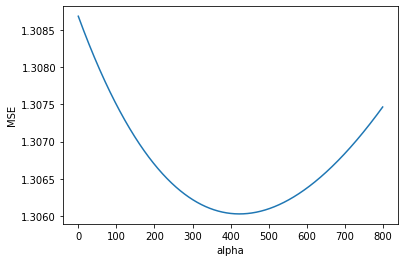

In [261]:
#2
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# ridge regression
MSE_list=[]
n=800
min_record,min_i = 100000,0
for i in range(n):
    RR = Ridge(alpha=i/100)
    X1, X2, y1, y2 = train_test_split(X_tr, y_tr, test_size=0.25,random_state=208) #we don't fix the validation set
    RR.fit(X1, y1)
    MSE = np.square(RR.predict(X2) - y2).mean()
    if MSE < min_record:
        min_record = MSE
        min_i = i
    MSE_list.append(MSE)
plt.plot(list(range(n)),MSE_list)
plt.xlabel('alpha')
plt.ylabel('MSE')

RR = Ridge(alpha=min_i/100)
RR.fit(X_tr, y_tr)
MSE = np.square(RR.predict(X_te) - y_te).mean()

print('The MSE of Ridge is '+str(MSE)+', The tuning parameter is '+str(min_i/100)+'.')

.

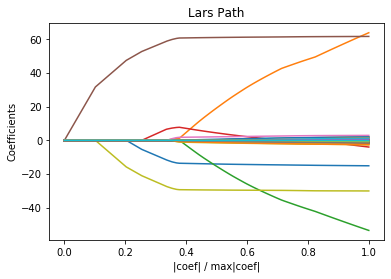

In [265]:
#3
from sklearn import linear_model
alpha0, _, coefs0 = linear_model.lars_path(X_tr0, y_tr, method='lasso', verbose=True)
plot_lars(coefs0, lines=False, title="Lars Path")

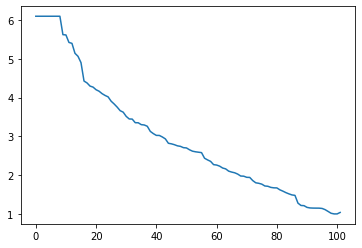

In [266]:
MSE_list = []

for alpha_0 in alpha:
    LAS = linear_model.LassoLars(alpha = alpha_0)
    LAS.fit(X_tr0, y_tr)
    MSE_list.append(np.square(LAS.predict(X_te0) - y_te).mean())
plt.plot(range(len(alpha)),MSE_list)   # the X axis is the index of lambda

.

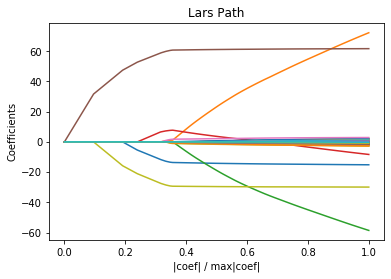

In [267]:
#4
alpha, _, coefs1 = linear_model.lars_path(X_tr0, y_tr, method='lar', verbose=True)
plot_lars(coefs1, lines=False, title="Lars Path")

Actually, they give similar plots. The LARS algorithm is a greedy method that does not yield a provably consistent estimator (in other words, it does not converge to a stable result when you increase the number of samples). 

reference: https://stats.stackexchange.com/questions/4663/least-angle-regression-vs-lasso

In [293]:
activediff = []
for i in range(100):
    a = coefs0[i,:].tolist().count(0)
    b = coefs1[i,:].tolist().count(0)
    if a!=b:
        activediff.append(i+1)
str0 = ''
for j in activediff:
    str0 += str(j)
    str0 += ','
print('the active sets differ at '+ str0)

the active sets differ at 4,17,22,24,26,31,33,34,35,38,41,44,46,56,59,60,62,80,83,88,94,100,


.

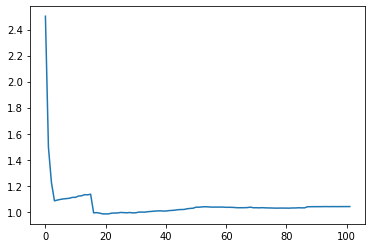

In [300]:
# 5
alpha0, _, coefs0 = linear_model.lars_path(X_0, y_tr, method='lasso', verbose=True)

MSE_list = []
for j in range(1, 103):
    indices = [i for i, x in enumerate(coefs0[:,j].tolist()) if x != 0]
    X_new, y_new = X_tr0[:,indices],y_tr
    OLS = LinearRegression()
    OLS.fit(X_new, y_new)
    MSE_list.append(np.square(OLS.predict(X_te0[:,indices]) - y_te).mean())

plt.plot(list(range(102)),MSE_list)

Notice that although the error is decreasing, it has only several obvious decreasing steps.

##### 6
If my boss said that they wanted a a smaller model then I will choose LASSO model. The L1 penalty makes more coefficients equal zero which makes the model smaller. 

I choose the model with the smallest test error when I doesn't care about the computational complexity and only care about the accuracy.   